# Using FER

In [2]:
# %pip install FER

In [3]:

# We install the FER() library to perform facial recognition
# This installation will also take care of any of the above dependencies if they are missing


from fer import FER
import cv2
# import matplotlib.pyplot as plt 
# %matplotlib inline

# test_image_one = cv2.imread("1.jpg")
# emo_detector = FER(mtcnn=True)


In [4]:
# test_image_one.shape

In [5]:
# Capture all the emotions on the image
# captured_emotions = emo_detector.detect_emotions(test_image_one)
# # Print all captured emotions with the image
# print(captured_emotions)
# cv2.imshow('Image',test_image_one)

# # Use the top Emotion() function to call for the dominant emotion in the image
# dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
# print(dominant_emotion, emotion_score)

In [20]:
def get_emotions(image):
    """
    The function returns the caputered emotions from the FER library
    
    """
    if isinstance(image, str):
        image = cv2.imread(image)

    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(image)
    dominant_emotion, emotion_score = emo_detector.top_emotion(image)
    return captured_emotions, dominant_emotion, emotion_score

In [21]:
captured_emotions, dominant_emotion, emotion_score = get_emotions('1.jpg')

In [22]:
dominant_emotion

'neutral'

In [23]:
emotion_score

0.83

In [24]:
captured_emotions

[{'box': [448, 193, 185, 223],
  'emotions': {'angry': 0.06,
   'disgust': 0.0,
   'fear': 0.03,
   'happy': 0.04,
   'sad': 0.01,
   'surprise': 0.02,
   'neutral': 0.83}}]

In [25]:
def is_neutral(image, other_emotions_threshhold =0.75,dominant_emotion_threshhold = 0.75 ):
    """
    Function returns a boolean if the expression in the image is neautral.
    Parameters:
        1. Image = File path or ndarray
        2. other_emotions_threshhold = 0 to 1. Threshold above which any other emotion is considered as dominant
        3. dominant_emotion_threshhold - above what threshhold of neautrality it is really neautral
        For example, some happy faces are considered neutral woth around 0.8 neautrality hence, it is set at 0.75
    """
    captured_emotions, dominant_emotion, dominant_emotion_score = get_emotions(image)
    print(captured_emotions)
    if dominant_emotion == 'neutral' and dominant_emotion_score>dominant_emotion_threshhold :
        return True
    else:
        if dominant_emotion_score > other_emotions_threshhold:
            return False
        return True
            

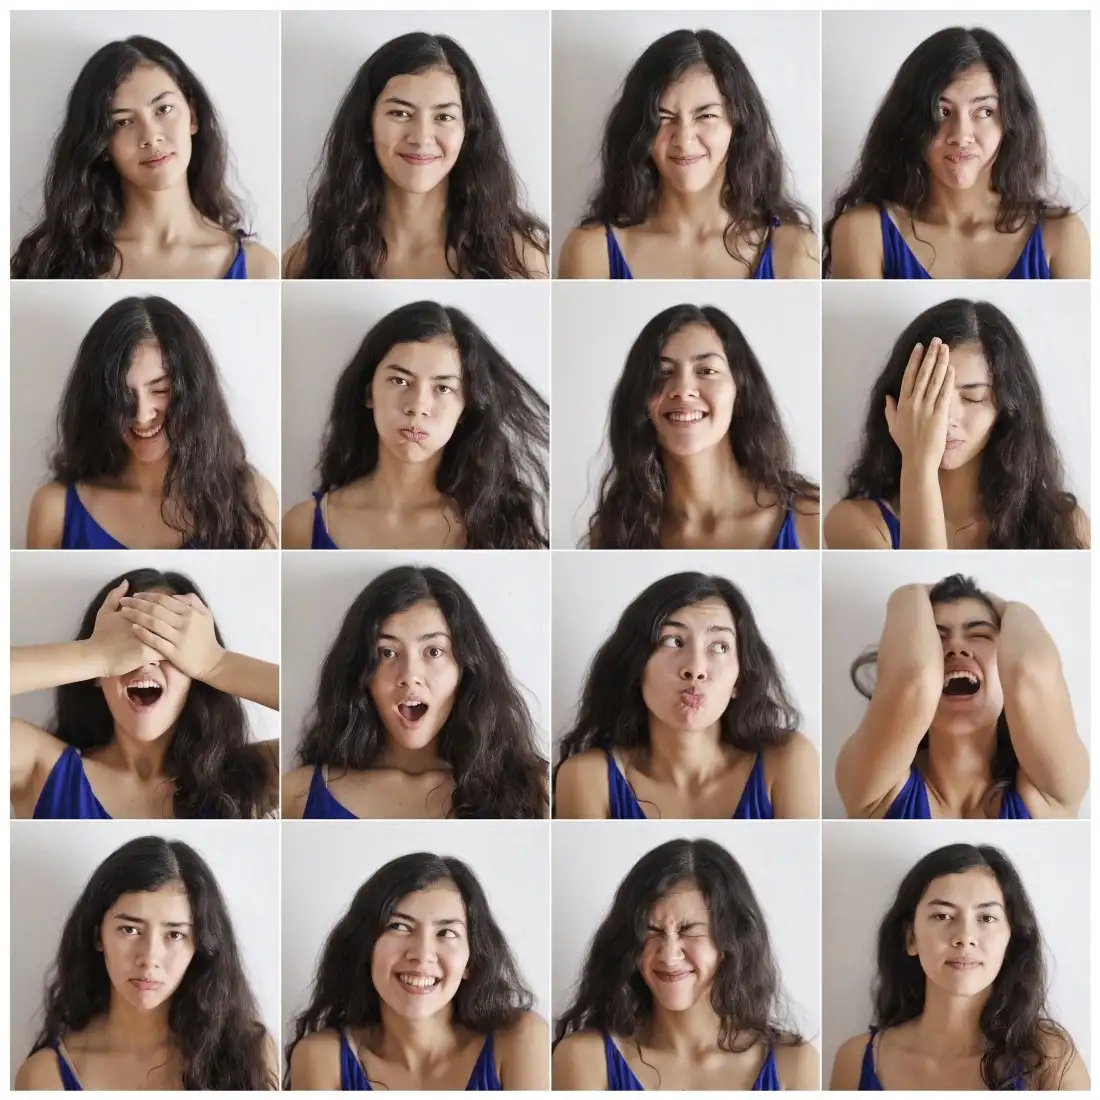

In [26]:
print(is_neutral('9.png'))

[{'box': [147, 99, 143, 190], 'emotions': {'angry': 0.12, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.0, 'sad': 0.14, 'surprise': 0.0, 'neutral': 0.72}}]
True


# Composing Ready Code

In [28]:
from fer import FER
import cv2

def get_emotions(image):
    """
    The function returns the caputered emotions from the FER library
    
    """
    if isinstance(image, str):
        image = cv2.imread(image)

    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(image)
    dominant_emotion, emotion_score = emo_detector.top_emotion(image)
    return captured_emotions, dominant_emotion, emotion_score

def is_neutral(image, other_emotions_threshhold =0.75,dominant_emotion_threshhold = 0.75 ):
    """
    Function returns a boolean if the expression in the image is neautral.
    Parameters:
        1. Image = File path or ndarray
        2. other_emotions_threshhold = 0 to 1. Threshold above which any other emotion is considered as dominant
        3. dominant_emotion_threshhold - above what threshhold of neautrality it is really neautral
        For example, some happy faces are considered neutral woth around 0.8 neautrality hence, it is set at 0.75
    """
    captured_emotions, dominant_emotion, dominant_emotion_score = get_emotions(image)
    print(captured_emotions)
    if dominant_emotion == 'neutral' and dominant_emotion_score>dominant_emotion_threshhold :
        return True
    else:
        if dominant_emotion_score > other_emotions_threshhold:
            return False
        return True
            